Data Scraping

In [44]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import TimeoutException, NoSuchElementException
import time

# Set up WebDriver (Ensure you have the correct driver for your browser)
driver = webdriver.Chrome()

# Initial URL for the product reviews
url = "https://www.flipkart.com/realme-gt-2-pro-paper-green-128-gb/product-reviews/itm125e5a8c1de92?pid=MOBGCRYZJGW3UJWG&lid=LSTMOBGCRYZJGW3UJWGKRDEOJ&marketplace=FLIPKART"

# List to hold all reviews
all_reviews = []

# Function to extract reviews from the current page
def extract_reviews():
    review_elements = driver.find_elements(By.CLASS_NAME, "EPCmJX")
    
    # If no reviews are found on this page, return False to indicate it
    if not review_elements:
        return False

    for review in review_elements:
        review_data = {}
        try:
            review_data['rating'] = review.find_element(By.CLASS_NAME, "XQDdHH").text
        except Exception:
            review_data['rating'] = "N/A"
        
        try:
            review_data['review_title'] = review.find_element(By.CLASS_NAME, "z9E0IG").text
        except Exception:
            review_data['review_title'] = "N/A"

        try:
            review_data['review_content'] = review.find_element(By.CLASS_NAME, "ZmyHeo").text
        except Exception:
            review_data['review_content'] = "N/A"

        all_reviews.append(review_data)
    
    return True

# Navigate to the initial page
driver.get(url)

# Loop to navigate through pages using the "Next" button
while True:
    try:
        # Wait for reviews to load (Timeout is set to 10 seconds)
        WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CLASS_NAME, "EPCmJX")))
        
        # Extract reviews from the current page
        reviews_found = extract_reviews()
        
        # Check if there is a "Next" button for pagination
        try:
            next_button = driver.find_element(By.XPATH, "//a[contains(@class, '_9QVEpD') and span[text()='Next']]")
            
            # If reviews are not found but there is a Next button, continue to the next page
            if not reviews_found:
                print("No reviews on this page, but navigating to the next page.")
            else:
                print("Reviews found, navigating to the next page.")
            
            next_button.click()
            time.sleep(2)  # Optional: Add a short delay between page loads
        
        except NoSuchElementException:
            # No "Next" button found, stop the loop and close the window
            print("No Next button found. Closing browser.")
            driver.quit()
            break
    
    except TimeoutException:
        print("Timeout waiting for reviews, closing browser.")
        driver.quit()
        break

# Print all extracted reviews
for review in all_reviews:
    print(review)


Reviews found, navigating to the next page.
Reviews found, navigating to the next page.
Reviews found, navigating to the next page.
Reviews found, navigating to the next page.
Reviews found, navigating to the next page.


ElementClickInterceptedException: Message: element click intercepted: Element <a class="_9QVEpD" href="/realme-gt-2-pro-paper-green-128-gb/product-reviews/itm125e5a8c1de92?pid=MOBGCRYZJGW3UJWG&amp;lid=LSTMOBGCRYZJGW3UJWGKRDEOJ&amp;marketplace=FLIPKART&amp;page=6">...</a> is not clickable at point (961, 520). Other element would receive the click: <div class="H30l+S h-JV4l">...</div>
  (Session info: chrome=129.0.6668.72)
Stacktrace:
	GetHandleVerifier [0x00007FF7B9F0B645+29573]
	(No symbol) [0x00007FF7B9E80470]
	(No symbol) [0x00007FF7B9D3B6EA]
	(No symbol) [0x00007FF7B9D974EE]
	(No symbol) [0x00007FF7B9D94F3C]
	(No symbol) [0x00007FF7B9D92408]
	(No symbol) [0x00007FF7B9D9161A]
	(No symbol) [0x00007FF7B9D836BE]
	(No symbol) [0x00007FF7B9DB72FA]
	(No symbol) [0x00007FF7B9D82FF6]
	(No symbol) [0x00007FF7B9DB7510]
	(No symbol) [0x00007FF7B9DD86BC]
	(No symbol) [0x00007FF7B9DB70A3]
	(No symbol) [0x00007FF7B9D812DF]
	(No symbol) [0x00007FF7B9D82441]
	GetHandleVerifier [0x00007FF7BA23C58D+3375821]
	GetHandleVerifier [0x00007FF7BA287987+3684039]
	GetHandleVerifier [0x00007FF7BA27CDAB+3640043]
	GetHandleVerifier [0x00007FF7B9FCB7C6+816390]
	(No symbol) [0x00007FF7B9E8B77F]
	(No symbol) [0x00007FF7B9E875A4]
	(No symbol) [0x00007FF7B9E87740]
	(No symbol) [0x00007FF7B9E7659F]
	BaseThreadInitThunk [0x00007FFBA76E257D+29]
	RtlUserThreadStart [0x00007FFBA81AAF28+40]


In [45]:
len(all_reviews)

50

In [46]:
import pandas as pd
df = pd.DataFrame(all_reviews)

In [47]:
all_reviews

[{'rating': '5',
  'review_title': 'Great product',
  'review_content': 'Camera quality is super but sometimes need to improve image quality.... As like live photos..... And also need to improve the over explosure of camera when heavy light condition ..... Other mobile is super ... No lag issue ... Display is awesome... Battery backup super minimum 8 hours of sreen on time.... Sound is very decent loud and clear audio... Haptics are very good'},
 {'rating': '5',
  'review_title': 'Highly recommended',
  'review_content': "Best camera and value for money, loved the display, sound quality is so immersive and also the night photo is so good ..as well the videography of the Phone is addictive...I played pubg..it does get heated but it's bearable. Overall loved this Phone..and whoever is watching this, you shouldn't miss the opportunity that this phone is providing, go grab it😉"},
 {'rating': '5',
  'review_title': 'Classy product',
  'review_content': "I didn't Expect this gt 2 pro perform

In [49]:
all_reviews = df.to_csv('realme_G2_Pro_data.csv')

In [4]:
df = df.to_csv("iphone14_data.csv",)

In [50]:
df = pd.read_csv('realme_G2_Pro_data.csv')

In [52]:
df = df.drop(columns = 'Unnamed: 0')

In [53]:
df

,rating,review_title,review_content
0,5,Great product,Camera quality is super but sometimes need to ...
1,5,Highly recommended,"Best camera and value for money, loved the dis..."
2,5,Classy product,I didn't Expect this gt 2 pro performance.bcos...
3,5,Wonderful,It's top class mobile in that range. The best ...
4,5,Mind-blowing purchase,Great camara. I love micro pics of sand partic...
5,5,Just wow!,Great phone on this price range.Realme users w...
6,4,Worth the money,Finally Realme has comes up with this good loo...
7,5,Fabulous!,Pro's-\n*Display feels very premium\n*Top notc...
8,4,Delightful,This device is just perfect.\nCamera is amazin...
9,5,Did not meet expectations,Everything is awesome but Heat you couldn't ba...


In [5]:
iphone_data = pd.read_csv('iphone14_data.csv')

In [106]:
df = pd.read_csv('redmi_data.csv')

In [31]:
iphone_df = pd.concat([df1,df], ignore_index=True)

In [33]:
iphone_df = iphone_df.to_csv('iphone_data.csv')

In [34]:
df = pd.read_csv('iphone_data.csv')

In [35]:
df

,Unnamed: 0,rating,review_title,review_content
0,0,5,Great product,Nice camera but battery drain fast specially o...
1,1,5,Excellent,Just amazing!
2,2,5,Fabulous!,Best smart phone under this price range compar...
3,3,5,Just wow!,Good
4,4,5,Excellent,"Very nice product, camera quality is just amaz..."
...,...,...,...,...
1384,1384,5,Great product,"Great phone , worth the money"
1385,1385,5,Fabulous!,I was sceptical at first about moving form an ...
1386,1386,5,Highly recommended,Loved it
1387,1387,5,Classy product,Awesome pictures


In [27]:
df1 = df1.drop(columns= 'Unnamed: 0')

In [20]:
df = pd.read_csv('iphone_data.csv')

In [24]:
df

,rating,review_title,review_content
0,5,Great product,Nice camera but battery drain fast specially o...
1,5,Excellent,Just amazing!
2,5,Fabulous!,Best smart phone under this price range compar...
3,5,Just wow!,Good
4,5,Excellent,"Very nice product, camera quality is just amaz..."
...,...,...,...
1037,5,Great product,"Great phone , worth the money"
1038,5,Fabulous!,I was sceptical at first about moving form an ...
1039,5,Highly recommended,Loved it
1040,5,Classy product,Awesome pictures


In [25]:
df1 = pd.read_csv('iphone14_data.csv')

In [36]:
df = pd.read_csv("iphone_data.csv")
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

In [109]:
df

,rating,review_title,review_content
0,4,Delightful,Nice Products 👌🏻 but Price 😒
1,4,Good choice,"Nice design, Awesome Display with above averag..."
2,5,Awesome,Nice camera love it
3,5,Great product,Best Phone Ever I Love It..... Awesome 😍😍😍😍😍
4,5,Just wow!,Camera 📷 Quality Very Good. I like this phone
...,...,...,...
119,5,Fabulous!,Camera and other things are good and performan...
120,5,Wonderful,Awesome phone
121,5,Brilliant,Nothing more expecting from xiomi.. Absolute g...
122,5,Terrific,Must buy this phone. It's display quality and ...


In [50]:
len((all_reviews_real_me))

348

In [53]:
import pandas as pd
df = pd.DataFrame(all_reviews_real_me)

In [111]:
df =  pd.read_csv('flipkart_reviews_dataset.csv')

In [112]:
df

,product_id,product_title,rating,summary,review,location,date,upvotes,downvotes
0,ACCFZGAQJGYCYDCM,BoAt Rockerz 235v2 with ASAP charging Version ...,5,Terrific purchase,1-more flexible2-bass is very high3-sound clar...,Shirala,8 months ago,1390,276
1,ACCFZGAQJGYCYDCM,BoAt Rockerz 235v2 with ASAP charging Version ...,5,Terrific purchase,Super sound and good looking I like that prize,Visakhapatnam,8 months ago,643,133
2,ACCFZGAQJGYCYDCM,BoAt Rockerz 235v2 with ASAP charging Version ...,5,Super!,Very much satisfied with the device at this pr...,Kozhikode,"Feb, 2020",1449,328
3,ACCFZGAQJGYCYDCM,BoAt Rockerz 235v2 with ASAP charging Version ...,5,Super!,"Nice headphone, bass was very good and sound i...",Jaora,7 months ago,160,28
4,ACCFZGAQJGYCYDCM,BoAt Rockerz 235v2 with ASAP charging Version ...,5,Terrific purchase,Sound quality super battery backup super quali...,New Delhi,8 months ago,533,114
...,...,...,...,...,...,...,...,...,...
9369,ACCEVQZABYWJHRHF,BoAt BassHeads 100 Wired Headset,4,Good quality product,this head phnes give good base in pluged ears ...,Bhimavaram,"Apr, 2018",0,0
9370,ACCEVQZABYWJHRHF,BoAt BassHeads 100 Wired Headset,5,Awesome,This so far is one of the best headphones I've...,Ettimadai,"Apr, 2018",0,0
9371,ACCEVQZABYWJHRHF,BoAt BassHeads 100 Wired Headset,4,Really Nice,I am a BASS LOVER and all others like me read ...,Guntur District,"Apr, 2018",0,0
9372,ACCEVQZABYWJHRHF,BoAt BassHeads 100 Wired Headset,5,Super!,After use of one month........ It is an excell...,Kothamangalam,"Apr, 2018",0,0


In [55]:
df = df.to_csv('iphone_data.csv')

Data Cleaning and Structuring

In [2]:
import pandas as pd

# Load the dataset
iphone_data = pd.read_csv('iphone_data.csv')
moto_data = pd.read_csv('moto_data.csv')
motorola_data = pd.read_csv('motorola_data.csv')
redmi_data = pd.read_csv('redmi_data.csv')
vivo_data = pd.read_csv('vivo_data.csv')
one_plus_data = pd.read_csv('one_plus_data.csv')

# Clean the data (removing HTML tags, handling NaNs, normalizing text)
# df['review'] = df['review'].str.replace(r'<[^>]*>', '', regex=True)
# df.dropna(inplace=True)

# Clean and process iphone_data
iphone_data['review_title'] = iphone_data['review_title'].str.replace(r'<[^>]*>', '', regex=True)
iphone_data.dropna(inplace=True)

# Clean and process vivo_data
vivo_data['review_title'] = vivo_data['review_title'].str.replace(r'<[^>]*>', '', regex=True)
vivo_data.dropna(inplace=True)

# Clean and process realme_data
#realme_data['review_title'] = realme_data['review_title'].str.replace(r'<[^>]*>', '', regex=True)
#realme_data.dropna(inplace=True)

# Clean and process redmi_data
redmi_data['review_title'] = redmi_data['review_title'].str.replace(r'<[^>]*>', '', regex=True)
redmi_data.dropna(inplace=True)

# Clean and process samsung_data
#samsung_data['review_title'] = samsung_data['review_title'].str.replace(r'<[^>]*>', '', regex=True)
#samsung_data.dropna(inplace=True)

# Clean and process one_plus_data
one_plus_data['review_title'] = one_plus_data['review_title'].str.replace(r'<[^>]*>', '', regex=True)
one_plus_data.dropna(inplace=True)

# Clean and process moto_data
moto_data['review_title'] = moto_data['review_title'].str.replace(r'<[^>]*>', '', regex=True)
moto_data.dropna(inplace=True)

# Clean and process motorola_data
motorola_data['review_title'] = motorola_data['review_title'].str.replace(r'<[^>]*>', '', regex=True)
motorola_data.dropna(inplace=True)

# Clean and process iphone_data again (since you mentioned it twice)
iphone_data['review_title'] = iphone_data['review_title'].str.replace(r'<[^>]*>', '', regex=True)
iphone_data.dropna(inplace=True)


# Convert ratings to numerical
# df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Convert ratings to numerical and handle invalid ratings for iphone_data
iphone_data['rating'] = pd.to_numeric(iphone_data['rating'], errors='coerce')
iphone_data = iphone_data.dropna(subset=['rating'])

# Convert ratings to numerical and handle invalid ratings for vivo_data
vivo_data['rating'] = pd.to_numeric(vivo_data['rating'], errors='coerce')
vivo_data = vivo_data.dropna(subset=['rating'])

# Convert ratings to numerical and handle invalid ratings for realme_data
#realme_data['rating'] = pd.to_numeric(realme_data['rating'], errors='coerce')
#realme_data = realme_data.dropna(subset=['rating'])

# Convert ratings to numerical and handle invalid ratings for redmi_data
redmi_data['rating'] = pd.to_numeric(redmi_data['rating'], errors='coerce')
redmi_data = redmi_data.dropna(subset=['rating'])

# Convert ratings to numerical and handle invalid ratings for samsung_data
#samsung_data['rating'] = pd.to_numeric(samsung_data['rating'], errors='coerce')
#samsung_data = samsung_data.dropna(subset=['rating'])

# Convert ratings to numerical and handle invalid ratings for one_plus_data
one_plus_data['rating'] = pd.to_numeric(one_plus_data['rating'], errors='coerce')
one_plus_data = one_plus_data.dropna(subset=['rating'])

# Convert ratings to numerical and handle invalid ratings for moto_data
moto_data['rating'] = pd.to_numeric(moto_data['rating'], errors='coerce')
moto_data = moto_data.dropna(subset=['rating'])

# Convert ratings to numerical and handle invalid ratings for motorola_data
motorola_data['rating'] = pd.to_numeric(motorola_data['rating'], errors='coerce')
motorola_data = motorola_data.dropna(subset=['rating'])

# Remove rows with missing or invalid ratings
# df = df.dropna(subset=['rating'])

# Drop rows with missing or invalid ratings for iphone_data
iphone_data = iphone_data.dropna(subset=['rating'])

# Drop rows with missing or invalid ratings for vivo_data
vivo_data = vivo_data.dropna(subset=['rating'])

# Drop rows with missing or invalid ratings for realme_data
#realme_data = realme_data.dropna(subset=['rating'])

# Drop rows with missing or invalid ratings for redmi_data
redmi_data = redmi_data.dropna(subset=['rating'])

# Drop rows with missing or invalid ratings for samsung_data
#samsung_data = samsung_data.dropna(subset=['rating'])

# Drop rows with missing or invalid ratings for one_plus_data
one_plus_data = one_plus_data.dropna(subset=['rating'])

# Drop rows with missing or invalid ratings for moto_data
moto_data = moto_data.dropna(subset=['rating'])

# Drop rows with missing or invalid ratings for motorola_data
motorola_data = motorola_data.dropna(subset=['rating'])



# Concatenate all datasets
all_data = pd.concat([iphone_data, moto_data, motorola_data, redmi_data, vivo_data, one_plus_data], ignore_index=True)

# Save the concatenated dataset to a CSV file
all_data.to_csv('flipkart_reviews_dataset_cleaned.csv', index=False)
print("All data concatenated, cleaned, and saved.")




All data concatenated, cleaned, and saved.


In [16]:
df = pd.read_csv("flipkart_reviews_dataset_cleaned.csv")
df = all_data.loc[:, ~df.columns.str.contains('^Unnamed')]

In [17]:
df

,rating,review_title,review_content,Model,Price
0,5,Great product,Nice camera but battery drain fast specially o...,iphone,51999.0
1,5,Excellent,Just amazing!,iphone,51999.0
2,5,Fabulous!,Best smart phone under this price range compar...,iphone,51999.0
3,5,Just wow!,Good,iphone,51999.0
4,5,Excellent,"Very nice product, camera quality is just amaz...",iphone,51999.0
...,...,...,...,...,...
1915,5,Just wow!,Great Mobile,NaN,NaN
1916,1,Worst experience ever!,"I bought mobile 1 week back, Mobile Data was t...",NaN,NaN
1917,5,Awesome,Nice phone... good performance 💯,NaN,NaN
1918,5,Brilliant,Best quality,NaN,NaN


In [18]:
df = df[['rating','review_content']]

In [19]:
df['sentiment'] = df['rating'].apply(lambda x:1 if x > 3 else 0)

C:\Users\Anandvj\AppData\Local\Temp\ipykernel_40124\1243275511.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment'] = df['rating'].apply(lambda x:1 if x > 3 else 0)


In [20]:
df

,rating,review_content,sentiment
0,5,Nice camera but battery drain fast specially o...,1
1,5,Just amazing!,1
2,5,Best smart phone under this price range compar...,1
3,5,Good,1
4,5,"Very nice product, camera quality is just amaz...",1
...,...,...,...
1915,5,Great Mobile,1
1916,1,"I bought mobile 1 week back, Mobile Data was t...",0
1917,5,Nice phone... good performance 💯,1
1918,5,Best quality,1


In [21]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TfidfVectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the review content to TF-IDF matrix
tfidf_matrix = vectorizer.fit_transform(df['review_content'])

# Convert the result to a DataFrame for better readability
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# Display the DataFrame with tokenized and vectorized content
tfidf_df


,09,10,100,108,1080,1080p,10days,10mp,11,11min,...,yesterday,yet,yoo,you,younger,your,youtubers,zeiss,zero,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.09097,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1915,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
1916,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
1917,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
1918,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
x = 'tfidf_matrix'
y = df['sentiment']

In [26]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

# Create a synthetic imbalanced dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=2, 
                           n_redundant=10, n_clusters_per_class=1, weights=[0.9], 
                           flip_y=0, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Fit SMOTE to the training data and resample it
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# You can now use X_resampled and y_resampled for model training


In [32]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score


# Logistic Regression
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_resampled, y_resampled)
y_pred_logistic = logistic_model.predict(X_test)
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)

# Gradient Boosting Model
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_resampled, y_resampled)
y_pred_gb = gb_model.predict(X_test)
accuracy_gb = accuracy_score(y_test, y_pred_gb)

# Random Forest Model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_resampled, y_resampled)
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# Print accuracies
print(f'Logistic Regression Accuracy: {accuracy_logistic:.2f}')
print(f'Gradient Boosting Accuracy: {accuracy_gb:.2f}')
print(f'Random Forest Accuracy: {accuracy_rf:.2f}')


Logistic Regression Accuracy: 0.97
Gradient Boosting Accuracy: 0.99
Random Forest Accuracy: 0.99


4.Sentiment analysis for visuvalisation

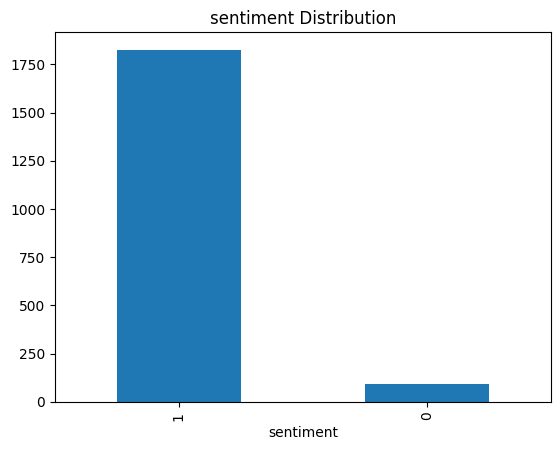

In [33]:
import matplotlib.pyplot as plt

# Visualize sentiment distribution
df['sentiment'].value_counts().plot(kind='bar')
plt.title('sentiment Distribution')
plt.show()




